In [1]:
import pandas as pd
import numpy as np
import sklearn.decomposition as skd
from optimization import optimize_portfolio

sp500_df = pd.read_csv('sp500.csv')
sp500_df_price = pd.read_csv('sp500_price.csv')
sp500_df_price.set_index('date', inplace=True)

sp500_df.set_index('date', inplace=True)
#make sure the index is the same
sp500_df_price = sp500_df_price[sp500_df_price.index.isin(sp500_df.index)]
# print(sp500_df.head())
sp500_df = sp500_df.pct_change()
sp500_df.dropna(inplace=True)
changes = sp500_df.values
sp500_changes = sp500_df_price.pct_change()
sp500_changes.dropna(inplace=True)
sp500_changes = sp500_changes.values
#split into train and test
train = changes[:int(changes.shape[0]*0.8)]
test = changes[int(changes.shape[0]*0.8):]
sp500_train = sp500_changes[:int(changes.shape[0]*0.8)]
sp500_test = sp500_changes[int(changes.shape[0]*0.8):]

In [2]:
import matplotlib.pyplot as plt

In [3]:
#load cluster weights


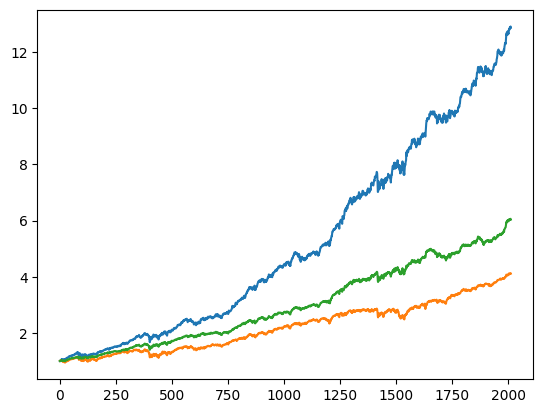

In [15]:
naive_weights = np.load('weights/naive.npy')
kerenel_weights = np.load('runs/naiveKernel/weights.npz')['arr_0']
cluster_weights = np.load('weights\Kernel_cluster_overall_weights18.npy')
plt.plot(np.cumprod(1+train@naive_weights))
plt.plot(np.cumprod(1+train@kerenel_weights))
plt.plot(np.cumprod(1+train@cluster_weights))

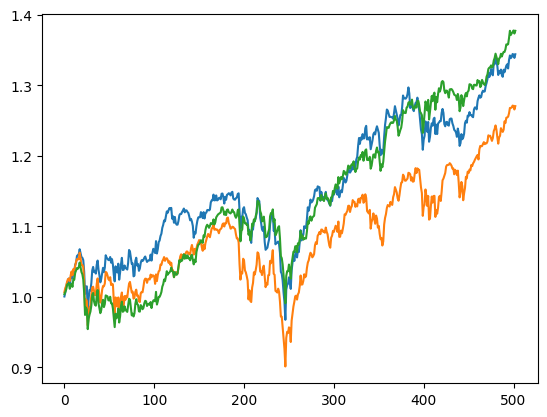

In [16]:
plt.plot(np.cumprod(1+test@naive_weights))
plt.plot(np.cumprod(1+test@kerenel_weights))
plt.plot(np.cumprod(1+test@cluster_weights))

In [17]:
print("shape ratio SP500: ", np.mean(sp500_train)/np.std(sp500_train)*np.sqrt(252))
print("shape ratio naive: ", np.mean(train@naive_weights)/np.std(train@naive_weights)*np.sqrt(252))
print("shape ratio kernel: ", np.mean(train@kerenel_weights)/np.std(train@kerenel_weights)*np.sqrt(252))
print("shape ratio cluster: ", np.mean(train@cluster_weights)/np.std(train@cluster_weights)*np.sqrt(252))

shape ratio SP500:  0.8045079617499685
shape ratio naive:  2.266345377549489
shape ratio kernel:  1.2015700361117534
shape ratio cluster:  1.9691166924425374


In [18]:
print("YoY return SP500: ", 100*(np.cumprod(1+sp500_train)[-1]**(252/len(sp500_train))-1))
print("YoY return naive: ", 100*(np.cumprod(1+train@naive_weights)[-1]**(252/len(train))-1))
print("YoY return kernel: ", 100*(np.cumprod(1+train@kerenel_weights)[-1]**(252/len(train))-1))
print("YoY return cluster: ", 100*(np.cumprod(1+train@cluster_weights)[-1]**(252/len(train))-1))


YoY return SP500:  11.352933386800235
YoY return naive:  37.69934634701879
YoY return kernel:  19.36257034992459
YoY return cluster:  25.246293648934603


In [19]:
print("sharpe ratio test SP500: ", np.mean(sp500_test)/np.std(sp500_test)*np.sqrt(252))
print("sharpe ratio test naive: ", np.mean(test@naive_weights)/np.std(test@naive_weights)*np.sqrt(252))
print("sharpe ratio test kernel: ", np.mean(test@kerenel_weights)/np.std(test@kerenel_weights)*np.sqrt(252))
print("sharpe ratio test cluster: ", np.mean(test@cluster_weights)/np.std(test@cluster_weights)*np.sqrt(252))

sharpe ratio test SP500:  0.7099693617873225
sharpe ratio test naive:  1.199754125583714
sharpe ratio test kernel:  0.9201251688287962
sharpe ratio test cluster:  1.4244150680804775


In [9]:
print("YoY return SP500 test: ", 100*(np.cumprod(1+sp500_test)[-1]**(252/len(sp500_test))-1))
print("YoY return naive: ", 100*(np.cumprod(1+test@naive_weights)[-1]**(252/len(test))-1))
print("YoY return kernel: ", 100*(np.cumprod(1+test@kerenel_weights)[-1]**(252/len(test))-1))
print("YoY return cluster: ", 100*(np.cumprod(1+test@cluster_weights)[-1]**(252/len(test))-1))


YoY return SP500 test:  9.947757691284576
YoY return naive:  15.969664715738908
YoY return kernel:  12.743855435355055
YoY return cluster:  18.374570385266974


In [10]:
kerenel_weights.max()

0.0023364485981308414

In [11]:
naive_weights.max()

0.14695163760422378

In [37]:
import yfinance as yf

msft = yf.Ticker("MSFT")

company_name = msft.info['longName']
print(company_name)

Microsoft Corporation


In [42]:
import pickle

with open("weights\Kernel_clusters18.pkl",'rb') as f:
    clusters = pickle.load(f)

clusters
clutered_cols = []
for key in clusters.keys():
    clutered_cols += clusters[key]

min_cluster = min(clusters.values(), key=len)
min_cluster

['AWK', 'ED', 'DUK', 'EIX', 'ETR', 'EXC', 'FE', 'PPL', 'SO', 'WEC']

In [45]:
for i in clusters.keys():
    if "JPM" in clusters[i]:
        print("cluster ",i)
        print("Ticker & Company \\\\")
        print("\\hline")
        for ticker in clusters[i]:
            full_name = yf.Ticker(ticker).info['longName']
            print(ticker,"&",full_name,"\\\\")

cluster  7
Ticker & Company \\
\hline
AMP & Ameriprise Financial, Inc. \\
BK & The Bank of New York Mellon Corporation \\
C & Citigroup Inc. \\
FITB & Fifth Third Bancorp \\
JPM & JPMorgan Chase & Co. \\
LNC & Lincoln National Corporation \\
MET & MetLife, Inc. \\
NTRS & Northern Trust Corporation \\
PNC & The PNC Financial Services Group, Inc. \\
PRU & Prudential Financial, Inc. \\
RJF & Raymond James Financial, Inc. \\
STT & State Street Corporation \\
HIG & The Hartford Financial Services Group, Inc. \\
TFC & Truist Financial Corporation \\
USB & U.S. Bancorp \\
WFC & Wells Fargo & Company \\


In [48]:
for i in clusters.keys():
    if i==10:
        for ticker in clusters[i]:
            full_name = yf.Ticker(ticker).info['longName']
            print(ticker,"&",full_name,"\\\\")

LNT & Alliant Energy Corporation \\
AEE & Ameren Corporation \\
AEP & American Electric Power Company, Inc. \\
ATO & Atmos Energy Corporation \\
CNP & CenterPoint Energy, Inc. \\
CMS & CMS Energy Corporation \\
D & Dominion Energy, Inc. \\
DTE & DTE Energy Company \\
EVRG & Evergy, Inc. \\
ES & Eversource Energy \\
NEE & NextEra Energy, Inc. \\
NI & NiSource Inc. \\
PNW & Pinnacle West Capital Corporation \\
PEG & Public Service Enterprise Group Incorporated \\
SRE & Sempra \\
XEL & Xcel Energy Inc. \\


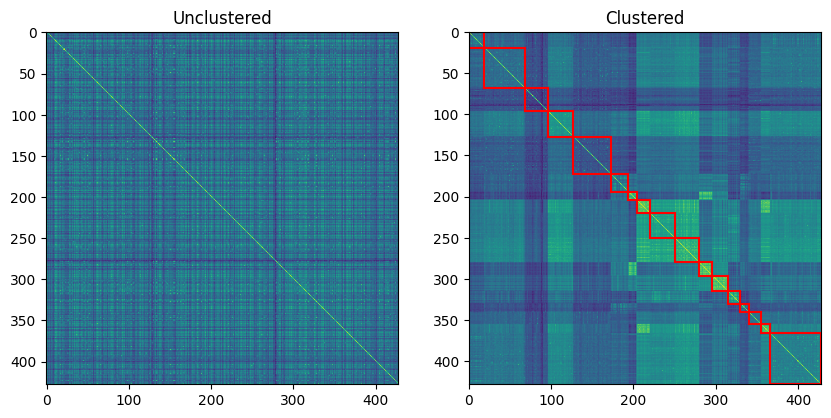

In [33]:
train_clustered = sp500_df[clutered_cols].values[:int(changes.shape[0]*0.8)]
train_clustered_corr = np.corrcoef(train_clustered.T)
train_unclustered_corr = np.corrcoef(train.T)

fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].imshow(train_unclustered_corr)
axs[0].set_title('Unclustered')
axs[1].imshow(train_clustered_corr)
plt.sca(axs[1])
x=0
for i in clusters.keys():
    xnew=x+len(clusters[i])
    plt.plot([x,xnew],[x,x],color='r')
    plt.plot([x,x],[x,xnew],color='r')
    plt.plot([x,xnew],[xnew,xnew],color='r')
    plt.plot([xnew,xnew],[x,xnew],color='r')
    x=xnew
plt.xlim([0,train_clustered_corr.shape[0]])
plt.ylim([train_clustered_corr.shape[0],0])
plt.title('Clustered')
plt.savefig('clustered_corr.png',dpi=300)
# plt.imshow(train_clustered_corr)